In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

We use the diabetes dataset from sklearn

In [2]:
diabetes = load_diabetes()

In [3]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [4]:
#df["target"] = diabetes.target

In [5]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


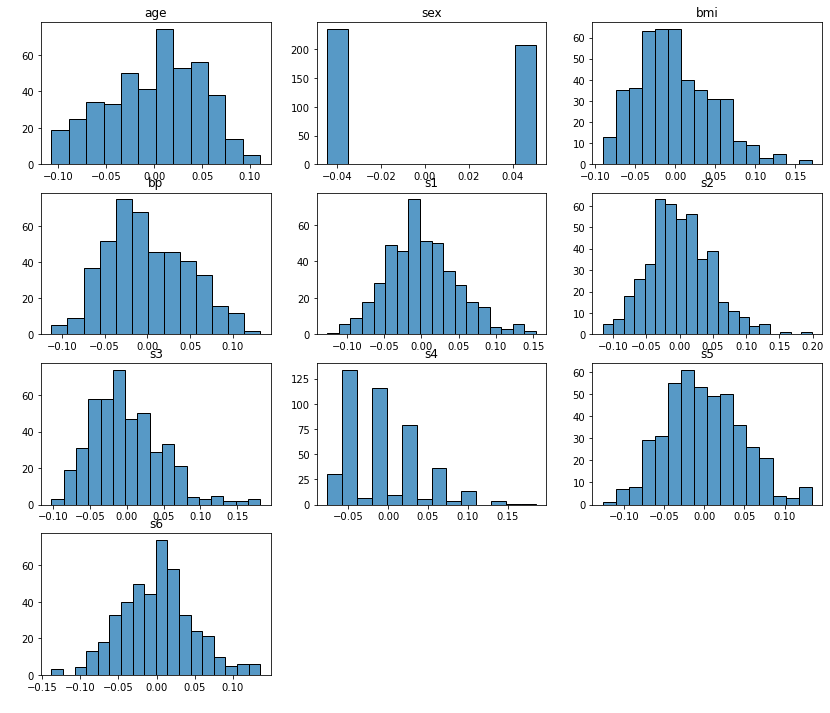

In [7]:
plt.figure(figsize=(14,12))

for i,col in enumerate(df.columns):
    plt.subplot(4, 3, i+1)
    sns.histplot(x=col, data=df)
    plt.title(col)
    plt.ylabel(" ")
    plt.xlabel(" ")

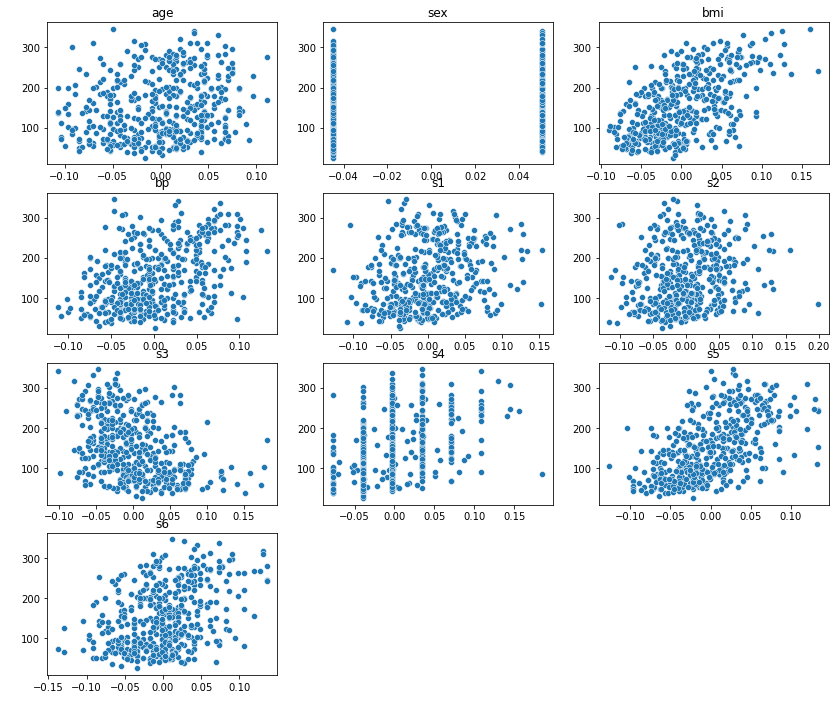

In [8]:
plt.figure(figsize=(14,12))

for i,col in enumerate(df.columns):
    plt.subplot(4, 3, i+1)
    sns.scatterplot(x=col, y=diabetes.target, data=df)
    plt.title(col)
    plt.ylabel(" ")
    plt.xlabel(" ")

## Linear Regression model

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [17]:
X = df[['age', 'bmi', 'bp', 's1', 's2', 's3', 's5', 's6']]
#X = df
y = diabetes.target

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)

In [18]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

In [19]:
mean_squared_error(y_val, y_pred, squared=False)

54.509532389163994

In [20]:
mean_squared_error(y_train, lr.predict(X_train), squared=False)

54.60185245658475

In [21]:
scores = -1 * cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')
np.mean(np.sqrt(scores))

55.58780162102901

In [22]:
scores = -1 * cross_val_score(Ridge(alpha=0.05), X, y, cv=5, scoring='neg_mean_squared_error')
np.mean(np.sqrt(scores))

55.64699731240686

In [23]:
scores = -1 * cross_val_score(Lasso(alpha=0.00001), X, y, cv=5, scoring='neg_mean_squared_error')
np.mean(np.sqrt(scores))

55.58774136727453